# Dataset

In [ ]:
from tqdm import tqdm
import numpy as np
import pandas as pd

raw = pd.read_csv('.../Progetto_Chris/Coding_Chris/Data_Kaggle/train.csv', dtype={'acoustic_data': np.int16, 'time_to_failure': np.float64})


In [ ]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629145480 entries, 0 to 629145479
Data columns (total 2 columns):
 #   Column           Dtype  
---  ------           -----  
 0   acoustic_data    int16  
 1   time_to_failure  float64
dtypes: float64(1), int16(1)
memory usage: 5.9 GB


raw.shape, raw.head()

In [ ]:
raw.isnull().sum()

acoustic_data      0
time_to_failure    0
dtype: int64

In [ ]:
print(raw.describe())

"""
La media del segnale acustico è di circa 4.52, suggerendo che in media il valore tende a essere positivo ma vicino a zero.
La deviazione standard è circa 10.74, indicando una varianza significativa nei valori di acoustic_data, con potenziali fluttuazioni ampie dal valore medio.

I quartili mostrano che il 50% dei dati (mediana) è 5, con il 25% dei dati che sono 2 o meno e il 75% dei dati che sono 7 o meno, confermando la 
concentrazione della maggior parte dei dati attorno al valore medio con alcune ampie deviazioni occasionali.
"""

       acoustic_data  time_to_failure
count   6.291455e+08     6.291455e+08
mean    4.519468e+00     5.678292e+00
std     1.073571e+01     3.672697e+00
min    -5.515000e+03     9.550396e-05
25%     2.000000e+00     2.625997e+00
50%     5.000000e+00     5.349798e+00
75%     7.000000e+00     8.173396e+00
max     5.444000e+03     1.610740e+01


'\nLa media del segnale acustico è di circa 4.52, suggerendo che in media il valore tende a essere positivo ma vicino a zero.\nLa deviazione standard è circa 10.74, indicando una varianza significativa nei valori di acoustic_data, con potenziali fluttuazioni ampie dal valore medio.\n\nI quartili mostrano che il 50% dei dati (mediana) è 5, con il 25% dei dati che sono 2 o meno e il 75% dei dati che sono 7 o meno, confermando la \nconcentrazione della maggior parte dei dati attorno al valore medio con alcune ampie deviazioni occasionali.\n'

## Acoustic data

In [ ]:
print(len(raw['acoustic_data'].unique()))
print(min(raw['acoustic_data'].unique()))
print(max(raw['acoustic_data'].unique()))

"""
dataset['acoustic_data'] contains 5354 unique values, which are in between -5515 and 5444
"""

5354
-5515
5444


"\ndataset['acoustic_data'] contains 5354 unique values, which are in between -5515 and 5444\n"

In [ ]:
print(raw['acoustic_data'].value_counts())

"""
I numeri alla sinistra rappresentano i valori unici nella colonna acoustic_data, mentre i numeri alla destra 
indicano quante volte ciascun valore appare nel DataFrame. Ad esempio, il valore 5 appare 73,883,469 volte.

Notiamo che I valori che appaiono più frequentemente sono tipicamente vicini a zero (5, 4, 6, 3, 7, …), 
il che potrebbe indicare una concentrazione di dati attorno a questi punti.

I valori nell’acoustic_data variano notevolmente, con alcuni valori estremi come -3113, -3277, 
che compaiono una sola volta. Questo suggerisce che il segnale acustico può avere occasionali picchi o cadute estreme.
"""

acoustic_data
 5       73883469
 4       73792388
 6       66416269
 3       66178259
 7       53817385
           ...   
-3113           1
-3277           1
-3120           1
-2197           1
-1843           1
Name: count, Length: 5354, dtype: int64


'\nI numeri alla sinistra rappresentano i valori unici nella colonna acoustic_data, mentre i numeri alla destra \nindicano quante volte ciascun valore appare nel DataFrame. Ad esempio, il valore 5 appare 73,883,469 volte.\n\nNotiamo che I valori che appaiono più frequentemente sono tipicamente vicini a zero (5, 4, 6, 3, 7, …), \nil che potrebbe indicare una concentrazione di dati attorno a questi punti.\n\nI valori nell’acoustic_data variano notevolmente, con alcuni valori estremi come -3113, -3277, \nche compaiono una sola volta. Questo suggerisce che il segnale acustico può avere occasionali picchi o cadute estreme.\n'

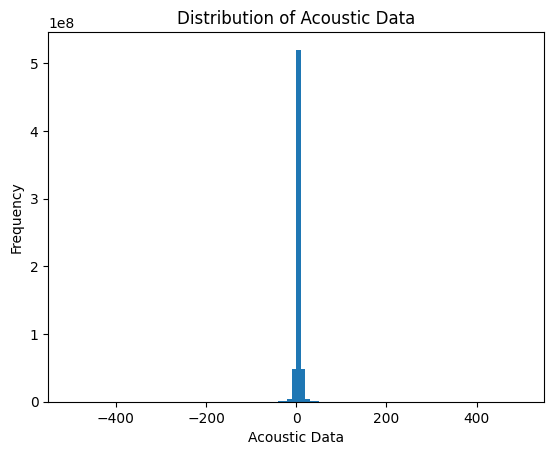

In [ ]:
# Let's check out intuition

# istogramma distribuzione dei valori di acoustic_data
import matplotlib.pyplot as plt
plt.hist(raw['acoustic_data'], bins=100, range=[-500, 500])  # Limita l'intervallo per una visualizzazione focalizzata
plt.title('Distribution of Acoustic Data')
plt.xlabel('Acoustic Data')
plt.ylabel('Frequency')
plt.show()

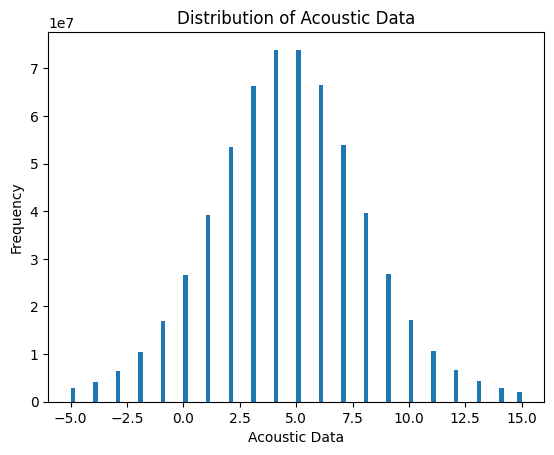

In [ ]:
# more zoomed in (around the mean circa)

plt.hist(raw['acoustic_data'], bins=100, range=[-5, 15])  # attorno alla media circa
plt.title('Distribution of Acoustic Data')
plt.xlabel('Acoustic Data')
plt.ylabel('Frequency')
plt.show()

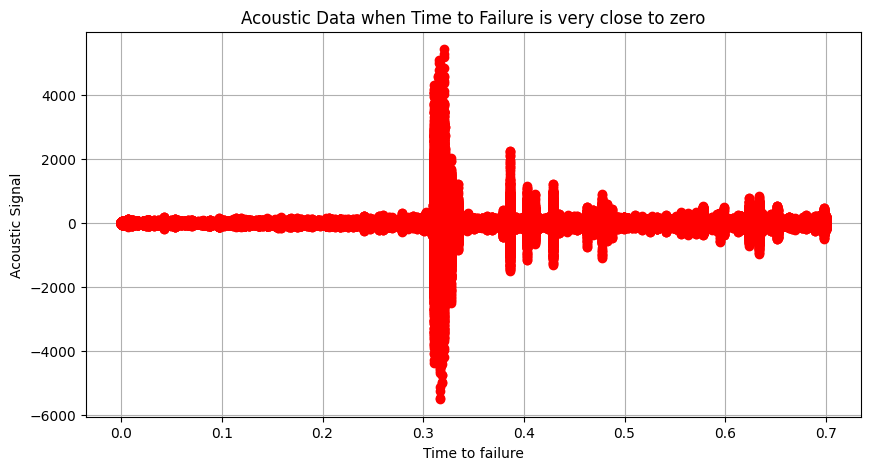

'\nPicco Significativo: \nIl picco notevole nei dati acustici intorno a 0.3 secondi prima del fallimento suggerisce un evento acustico estremamente alto, \nche potrebbe essere dovuto a una rottura o a uno stress critico nel materiale o nell’ambiente studiato. Questo picco potrebbe \nrappresentare il punto in cui le tensioni interne raggiungono un livello critico che precede immediatamente il collasso o il fallimento.\n\nQuasi Silenzio Post Picco: \nDopo questo picco, i dati mostrano una notevole riduzione dell’attività acustica. \nQuesto “quasi silenzio” potrebbe indicare che dopo la rottura iniziale o lo stress critico, \nci sono meno movimenti o meno interazioni tra le parti coinvolte, risultando in minori emissioni acustiche. \nQuesto periodo di quiete potrebbe durare fino al momento del fallimento effettivo, suggerendo che il danno critico è già avvenuto.\n'

In [ ]:
# visualizzazione acoustic data vicino ai terremoti

# Soglia per 'time_to_failure' considerata vicina a un evento critico
threshold = 0.7  # 0.7 sec prima del terremoto

# Filtra i dati dove 'time_to_failure' è inferiore alla soglia
critical_raw = raw[raw['time_to_failure'] <= threshold]

# Plottare i dati critici
plt.figure(figsize=(10, 5))
plt.plot(critical_raw['time_to_failure'], critical_raw['acoustic_data'], marker='o', linestyle='-', color='r')
plt.title('Acoustic Data when Time to Failure is very close to zero')
plt.xlabel('Time to failure')
plt.ylabel('Acoustic Signal')
plt.grid(True)
plt.show()


"""
Picco Significativo: 
Il picco notevole nei dati acustici intorno a 0.3 secondi prima del fallimento suggerisce un evento acustico estremamente alto, 
che potrebbe essere dovuto a una rottura o a uno stress critico nel materiale o nell’ambiente studiato. Questo picco potrebbe 
rappresentare il punto in cui le tensioni interne raggiungono un livello critico che precede immediatamente il collasso o il fallimento.

Quasi Silenzio Post Picco: 
Dopo questo picco, i dati mostrano una notevole riduzione dell’attività acustica. 
Questo “quasi silenzio” potrebbe indicare che dopo la rottura iniziale o lo stress critico, 
ci sono meno movimenti o meno interazioni tra le parti coinvolte, risultando in minori emissioni acustiche. 
Questo periodo di quiete potrebbe durare fino al momento del fallimento effettivo, suggerendo che il danno critico è già avvenuto.
"""

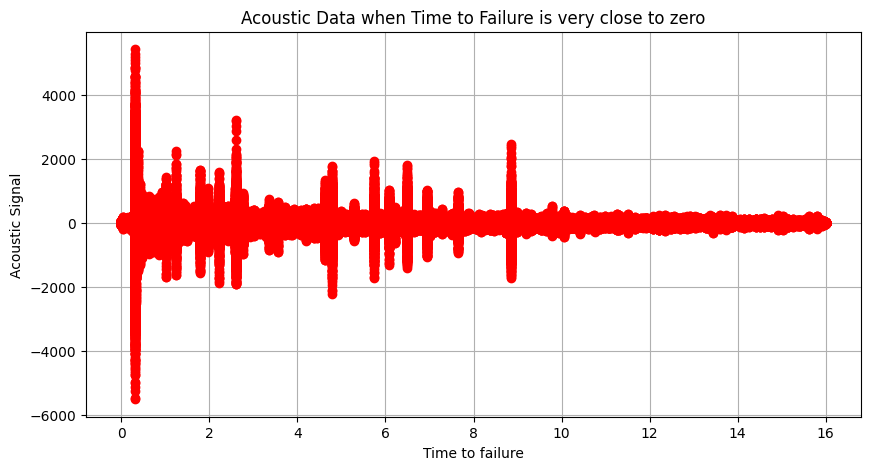

In [ ]:
# visualizzazione di tutti gli acoustic data 

# Soglia per 'time_to_failure' 
threshold = 16  # 16 sec prima del terremoto, praticamente tutti 

# Filtra i dati dove 'time_to_failure' è inferiore alla soglia
critical_raw = raw[raw['time_to_failure'] <= threshold]

# Plottare i dati critici
plt.figure(figsize=(10, 5))
plt.plot(critical_raw['time_to_failure'], critical_raw['acoustic_data'], marker='o', linestyle='-', color='r')
plt.title('Acoustic Data when Time to Failure is very close to zero')
plt.xlabel('Time to failure')
plt.ylabel('Acoustic Signal')
plt.grid(True)
plt.show()

cosa signfica quando acustic signal è negativo? cosa indica acoustic signal? Non indica il suono, perché come fa il suono ad essere negativo?

## Time to failure

In [ ]:
print(raw['time_to_failure'].max()) 
print(raw['time_to_failure'].min())

# max time until an earthquake is 16.1074 seconds

16.1074
9.5503963166e-05


: 

In [ ]:
# visualizziamo time to failure in tutto il dataset

x_axis = np.arange(raw.shape[0])
y_axis = raw['time_to_failure']

print(x_axis.shape)
print(y_axis.shape)

plt.figure(figsize=(10, 5))
plt.plot(x_axis, y_axis)
plt.title(f'Acoustic Data around the {i}-th Earthquake')
plt.xlabel('Time to failure')
plt.ylabel('Acoustic Signal')
plt.grid(True)
plt.show() 

(629145480,)
(629145480,)


In [ ]:
# visualizzare un unico terremoto. 

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Simulazione di un DataFrame (sostituire con il tuo effettivo DataFrame 'raw')

# Soglia per 'time_to_failure' considerata vicina a un evento critico
threshold = 0.7  # 0.7 sec prima del terremoto

# Identifica gli indici dove 'time_to_failure' è minimo (i.e., poco prima di un terremoto)
reset_indices = raw[raw['time_to_failure'].diff() < 0].index

# Numero del terremoto da visualizzare (es. il primo, secondo, terzo, ecc.)
i = 3  # Cambiare questo valore in base al terremoto specifico che vuoi visualizzare

# Assicurarsi che l'indice 'i' sia valido
if i <= len(reset_indices) and i > 0:
    # Indice del terremoto
    earthquake_index = reset_indices[i-1]

    # Seleziona i dati intorno al terremoto specifico
    window_size = 50  # Numero di campioni prima e dopo il terremoto da visualizzare
    data_slice = raw.loc[max(0, earthquake_index-window_size):earthquake_index+window_size]

    # Plottare i dati critici
    plt.figure(figsize=(10, 5))
    plt.plot(data_slice['time_to_failure'], data_slice['acoustic_data'], marker='o', linestyle='-', color='r')
    plt.title(f'Acoustic Data around the {i}-th Earthquake')
    plt.xlabel('Time to failure')
    plt.ylabel('Acoustic Signal')
    plt.grid(True)
    plt.show()
else:
    print(f"Earthquake index {i} is out of bounds. Only {len(reset_indices)} resets found.")

# Preprocessing

In [3]:
np.random.seed(1337) # reproducibility
chosen_noise = np.random.normal(0, 0.5, 150_000)

In [4]:
from utils_preprocessing import *

In [5]:
segment_size = 150_000

# indices_to_calculate di default è solo l'indice zero (cioè se non vogliamo spezzare il fenomeno)

indices_to_calculate = raw.index.values[::segment_size][:-1]
# ritorna una array numpy contenente indici iniziali per dividere il dataset raw 
# (pandas dataframe) in segmenti di lunghezza 150000
# [::150_000] Applica uno slicing all’array degli indici, selezionando ogni 150,000-esimo valore.
# [:-1] Esclude l’ultimo valore dall’array ottenuto.
# L’ultimo indice viene escluso per evitare un errore quando si cerca di creare un segmento che eccede la lunghezza del dataset.

"""
In particolare, raw.index.values ritorna un array NumPy degli indici del DataFrame raw.
Ad esempio: 

Supponiamo che il DataFrame raw abbia 600,000 righe con indici  0, 1, 2, ..., 599,999
raw = pd.DataFrame({'acoustic_data': np.random.randn(600_000)})
print(raw.index.values)
>>> [     0      1      2 ... 599997 599998 599999]

print(raw.index.values[::150_000])
>>> [     0 150000 300000 450000]

"""
pass

In [6]:
train = sample_train_gen(raw, chosen_noise, segment_size=segment_size, indices_to_calculate=indices_to_calculate)
gc.collect()
test = sample_test_gen(chosen_noise)

100%|██████████| 2624/2624 [00:17<00:00, 151.39it/s]


In [7]:
print(type(train))
print(train.shape)
print(train.info())
print('-----------------------')
print(type(test))
print(test.shape)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
(4194, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   var_num_peaks_2_denoise_simple  4194 non-null   float64
 1   var_percentile_roll50_std_20    4194 non-null   float64
 2   var_mfcc_mean18                 4194 non-null   float64
 3   var_mfcc_mean4                  4194 non-null   float64
 4   start                           4194 non-null   float64
 5   target                          4194 non-null   float64
dtypes: float64(6)
memory usage: 196.7 KB
None
-----------------------
<class 'pandas.core.frame.DataFrame'>
(2624, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2624 entries, 0 to 2623
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   var_num_

train è un dataframe pandas che contiene 4194 righe. Ciascuna riga riguarda un terremoto sample lungo 150000 (tranne l'ultimo che è un po' più lungo).

Per ciascuna riga (corrispondente ad un pezzo del dataset), abbiamo 6 informazioni:

1. il numero di picchi di quel pezzo di segnale
2. un'info sulla std
3. info su mfcc18 media
4. info su mfcc4 media
5. l'indice di start di quel segnale
6. quanto manca al terremoto di quel segnale

# Building training dataset

In [8]:
etq_meta = [
{"start":0,         "end":5656574},
{"start":5656574,   "end":50085878},
{"start":50085878,  "end":104677356},
{"start":104677356, "end":138772453},
{"start":138772453, "end":187641820},
{"start":187641820, "end":218652630},
{"start":218652630, "end":245829585},
{"start":245829585, "end":307838917},
{"start":307838917, "end":338276287},
{"start":338276287, "end":375377848},
{"start":375377848, "end":419368880},
{"start":419368880, "end":461811623},
{"start":461811623, "end":495800225},
{"start":495800225, "end":528777115},
{"start":528777115, "end":585568144},
{"start":585568144, "end":621985673},
{"start":621985673, "end":629145480},
]

# i indice da 0 a 16, etq è un dizionario {start: start_i, end: end_i}
for i, etq in enumerate(etq_meta):
    # fissato un etq in etq_meta, train.loc[condizione] seleziona tutte le righe del df train che soddisfano tale condizione
    # inoltre, train.loc[condizione, col] = val imposta i valori della colonna "col" delle righe selezionate dalla
    # condizione a val. se la colonna col non esiste (come in questo caso "eq" viene creata)
    # la condizione in questo caso è le righe del df train il cui evento sismico è contenuto nella
    # fisata finestra data dal dizionario etq
    train.loc[(train['start'] + segment_size >= etq["start"]) & (train['start'] <= etq["end"] - segment_size), "eq"] = i

# sostanzialmente quello che il ciclo for sopra fa è assegnare ad ogni pezzo di segnale in train, 
# il terremoto a cui appartiene (creando una nuova colonna eq nel df train che lo specifica con un indice)

# viene creato un nuovo dataframe che contiene solo le righe di train appartenenti ai terremoti
# numero 2; 7; 0; 4; 11; 13; 9; 1; 14; 10.
train_sample = train[train["eq"].isin([2, 7, 0, 4, 11, 13, 9, 1, 14, 10])]
    

In [9]:
print(train_sample.info())
print(train_sample)

# ATTENZIONE: nel df train_samples ci sono 2857 righe totali, ma l’indice originale 
# (cioè i numeri di riga) non è stato reimpostato e quindi non è più continuo
# L’indice va da 0 a 3902 ma con dei “buchi” (righe escluse o rimosse).
# l’indice delle righe manterrà i valori originali del DataFrame “padre” (in questo caso train)

<class 'pandas.core.frame.DataFrame'>
Index: 2857 entries, 0 to 3902
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   var_num_peaks_2_denoise_simple  2857 non-null   float64
 1   var_percentile_roll50_std_20    2857 non-null   float64
 2   var_mfcc_mean18                 2857 non-null   float64
 3   var_mfcc_mean4                  2857 non-null   float64
 4   start                           2857 non-null   float64
 5   target                          2857 non-null   float64
 6   eq                              2857 non-null   float64
dtypes: float64(7)
memory usage: 178.6 KB
None
      var_num_peaks_2_denoise_simple  var_percentile_roll50_std_20  \
0                             6210.0                      2.697163   
1                             6116.0                      2.701290   
2                             6748.0                      2.780605   
3                      

In [10]:
print(f"Mean:   {train_sample['target'].mean():.4}")
print(f"Median: {train_sample['target'].median():.4}")

Mean:   6.258
Median: 6.031


# Training

Implementa un modello di LightGBM con K-Fold Cross-Validation per la predizione di un target numerico (time to failure alla fine di un segnale) e calcola l’errore MAE (Mean Absolute Error)

In [11]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from numpy import random
import lightgbm as lgb # implementa il modello di LightGBM

random.seed(1337) # reproducibility

In [12]:
features = ['var_num_peaks_2_denoise_simple','var_percentile_roll50_std_20','var_mfcc_mean4',  'var_mfcc_mean18']

train_X = train_sample[features].values
target = train_sample["target"].values


test_X = test[features].values
# del test non conosciamo il target nella competizione kaggle


In [13]:
submission = pd.read_csv('.../Progetto_Chris/Coding_Chris/sample_submission.csv', index_col='seg_id')
# questo file, per ogni segmento, ha all'inzio 0 come submission (cioè time to failure predetto dal modello)
# poi viene aggiornato dopo aver trainato il modello facendo previsioni

In [14]:
oof = np.zeros(len(train_X)) 
# previsioni sulle righe del fold di validazione vengono chiamate OOF predictions.
# Infatti, durante la k-fold cross validation. I dati vengono divisi in K folds
# si addestra il modello su k-1 fold e si valida sul fold rimanente
# il processo si ripete per ogni fold, ogni fold viene quindi usata solo una volta
# come validazione. per questo oof ha len di train_X
# La validazione consiste nel fare previsioni sui dati del fold di validazione e
# poi confrontarle con i valori target noti. Alla fine, ottieni delle previsioni per
# tutte le righe del dataset di training perché ogni fold è stato usato 
# una volta per la validazione.

prediction = np.zeros(len(submission))

Che ci facciamo poi con le OOF predictions? 

Le OOF predictions vengono confrontate con i valori target per valutare la performance del modello. Questo avviene usando metriche come ad esempio MAE (Mean Absolute Error), RMSE (Root Mean Squared Error), Accuracy, ecc., a seconda del problema.


Attenzione: 
Durante la K-Fold Cross-Validation, per ogni iterazione (diversa suddivisione del dataset), il modello viene addestrato da zero usando i K-1 fold come dati di training.

- Il modello non mantiene i pesi dall’iterazione precedente.

- Si addestra un nuovo modello a partire da pesi iniziali randomici (o dai pesi iniziali standard del modello).

Quindi, durante la K-fold Cross-Validation addestriamo K modelli distinti indipendenti, uno per ogni iterazione. Ogni modello viene allenato su una combinazione diversa di K-1 fold di training. 

Ma Allora, cosa succede quando dobbiamo fare predizioni sul test set? Quale modello usiamo se ne addestriamo k? Tutti i K modelli vengono utilizzati per predire il test set. Le predizioni di ciascun modello vengono combinate facendo una media. Questa strategia permette di ottenere una predizione finale più robusta rispetto a quella di un singolo modello.

---------------------------------------------------

Nel codice sotto, la media delle predizioni avviene nel codice:

prediction += clf.predict(test_X, num_iteration=clf.best_iteration)

Cioè, ad ogni iterazione, il modello clf predice i valori del test set (test_X). Le predizioni vengono poi accumulate (sommate) in prediction. Infatti, Alla fine del ciclo di K-Fold abbiamo:

prediction /= n_fold



In [15]:
n_fold = 3        # 2 per training, 1 validation
                  # random_state=1337 for reproducibility
kf = KFold(n_splits=n_fold, shuffle=True, random_state=1337)
# kf dichiara (non agisce ancora sui dati) in quanti fold dobbiamo dividere
# il dataset. e dice come dividerli (shuffle, random state ...) 

kf = list(kf.split(np.arange(len(train_sample))))
# Il metodo split() di KFold prende in input gli indici di tutti i samples nel df di train
# Poi, sapendo quante iterazioni dobbiamo fare nell'addestramento (glielo dice KFold)
# diventa una lista con la seguente struttura (è una lista di liste):
# la dimensione più esterna è n_fold (ossia numero di iterazioni)
# dentro n_fold la lunghezza è 2 (cioè divide in indici di train e indici di valid per ogni iterazione)

"""
Esempio: 

Dataset di 9 elementi, quindi gli indici saranno [0, 1, 2, 3, 4, 5, 6, 7, 8]
indici shuffled: [5, 2, 8, 0, 1, 6, 7, 4, 3]
n_fold = 3

allora, kf.split li partiziona in questo modo:

Iterazione	Train Index	            Valid Index
1	        [0, 1, 6, 7, 4, 3]	    [5, 2, 8]
2	        [5, 2, 8, 7, 4, 3]	    [0, 1, 6]
3	        [5, 2, 8, 0, 1, 6]	    [7, 4, 3]
"""
pass

In [16]:
for fold_n, (train_index, valid_index) in enumerate(tqdm(kf, desc="Training Fold")):
    print(f'Iteration: {fold_n+1}/{len(kf)}')

    trn_data = lgb.Dataset(train_X[train_index], label=target[train_index])
    val_data = lgb.Dataset(train_X[valid_index], label=target[valid_index])
    
    params = {'num_leaves': 4,
      'min_data_in_leaf': 5,
      'objective':'fair',       # è un problema di regressione. 'fair' è una funzione obiettivo simile a MAE ma più robusta agli outlier 
      'max_depth': -1,
      'learning_rate': 0.02,
      "boosting": "gbdt",
      'boost_from_average': True,
      "feature_fraction": 0.9,
      "bagging_freq": 1,
      "bagging_fraction": 0.5,
      "bagging_seed": 0,
      "metric": 'mae',
      "verbosity": -1,
      'max_bin': 500,
      'reg_alpha': 0,
      'reg_lambda': 0,
      'seed': 0,
      'n_jobs': -1 # Usa tutti i core disponibili
      }
    

    callbacks = [lgb.early_stopping(stopping_rounds=1000, verbose=True),
                 lgb.log_evaluation(period=1000)]  # Stampa i log ogni 500 iterazioni


    clf = lgb.train(params, trn_data, num_boost_round=1000000, valid_sets = [trn_data, val_data], callbacks=callbacks)

    oof[valid_index] += clf.predict(train_X[valid_index], num_iteration=clf.best_iteration)
    prediction += clf.predict(test_X, num_iteration=clf.best_iteration)

prediction /= n_fold



Training Fold:   0%|          | 0/3 [00:00<?, ?it/s]

Iteration: 1/3
Training until validation scores don't improve for 1000 rounds
[1000]	training's l1: 1.59571	valid_1's l1: 2.00247


Training Fold:  33%|███▎      | 1/3 [00:00<00:01,  1.19it/s]

Early stopping, best iteration is:
[723]	training's l1: 1.64166	valid_1's l1: 1.97775
Iteration: 2/3
Training until validation scores don't improve for 1000 rounds


Training Fold:  67%|██████▋   | 2/3 [00:01<00:00,  1.45it/s]

[1000]	training's l1: 1.64201	valid_1's l1: 1.90799
Early stopping, best iteration is:
[245]	training's l1: 1.83521	valid_1's l1: 1.85719
Iteration: 3/3
Training until validation scores don't improve for 1000 rounds
[1000]	training's l1: 1.6403	valid_1's l1: 1.95581


Training Fold: 100%|██████████| 3/3 [00:02<00:00,  1.37it/s]

Early stopping, best iteration is:
[570]	training's l1: 1.71908	valid_1's l1: 1.94236


In [17]:
print('\nMAE: ', mean_absolute_error(target, oof))


MAE:  1.9257838730473038


In [18]:
submission['time_to_failure'] = prediction 
print(submission.head())
submission.to_csv('submission.csv')

            time_to_failure
seg_id                     
seg_00030f         4.072756
seg_0012b5         5.810596
seg_00184e         7.283951
seg_003339        10.577462
seg_0042cc         7.867414
